In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential


In [2]:
data_gen = ImageDataGenerator(rescale=1.0/255)

imgdir = 'a5_images' # or wherever you put them...
img_size = 64
batch_size = 32

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1600 images belonging to 2 classes.


### Retreive training set

In [3]:
Xbatch, Ybatch = train_generator.next()
Xbatch.shape


(32, 64, 64, 3)

In [4]:
Ybatch[4]

1.0

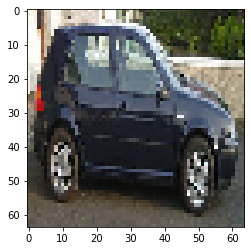

In [5]:
plt.imshow(Xbatch[4]);

### Retreive Test set

In [6]:
Xtest, Ytest = train_generator.next()
Xtest.shape
Ytest

array([1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

## Part 1: Training a convolutional neural network

In [139]:
def make_convnet():
    num_classes = 2 # Binary classification

    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                     activation='relu', input_shape=(img_size, img_size, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # As this is binary data using binary_cross_entropy
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])

    h = model.fit(Xbatch, Ybatch,
              batch_size=256,
              epochs=25,
              verbose=1,
              validation_data=(Xtest, Ytest));
    return model, h

In [140]:
model,h = make_convnet()

Epoch 1/25
1/1 [==============================] - 0s 369ms/step - loss: 0.6934 - accuracy: 0.4062 - val_loss: 0.6934 - val_accuracy: 0.5938
Epoch 2/25
1/1 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.37 - 0s 180ms/step - loss: 0.6934 - accuracy: 0.3750 - val_loss: 0.6934 - val_accuracy: 0.5938
Epoch 3/25
1/1 [==============================] - 0s 159ms/step - loss: 0.6934 - accuracy: 0.4062 - val_loss: 0.6934 - val_accuracy: 0.5625
Epoch 4/25
1/1 [==============================] - 0s 140ms/step - loss: 0.6934 - accuracy: 0.4062 - val_loss: 0.6934 - val_accuracy: 0.5938
Epoch 5/25
1/1 [==============================] - 0s 137ms/step - loss: 0.6934 - accuracy: 0.4062 - val_loss: 0.6934 - val_accuracy: 0.5938
Epoch 6/25
1/1 [==============================] - 0s 216ms/step - loss: 0.6934 - accuracy: 0.4062 - val_loss: 0.6934 - val_accuracy: 0.5938
Epoch 7/25
1/1 [==============================] - 0s 246ms/step - loss: 0.6934 - accuracy: 0.4062 - val_loss: 0.6934 -

## Plot the training and validation loss for each epoch.

### Explain what it means...
Training losses are low but validation losses are increasing indicating overfitting.


In [66]:
def plot_losses(max_epoch,h):
    loss_train = h.history['loss']
    loss_val = h.history['val_loss']
    epochs = range(1,max_epoch+1)
    plt.plot(epochs, loss_train, 'g', label='Training loss')
    plt.plot(epochs, loss_val, 'b', label='validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

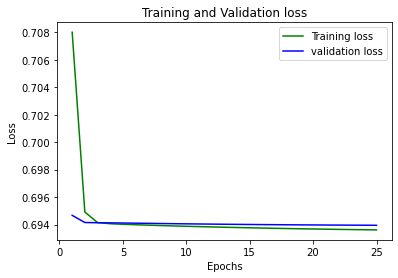

In [67]:
plot_losses(25, h)

## Plot the training and validation accuracies for each epoch

### Explain what it means...

Training accuracy is around 60-70% but validation accuracy is below 45%. This clearly indicates overfitting.

In [68]:
def plot_accuracy(max_epoch, h):
    acc_train = h.history['accuracy']
    acc_val = h.history['val_accuracy']
    epochs = range(1,max_epoch+1)
    plt.plot(epochs, acc_train, 'g', label='Training accuracy')
    plt.plot(epochs, acc_val, 'b', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

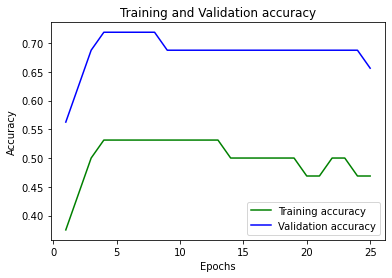

In [69]:
plot_accuracy(25, h)

### Using Evaluate function

In [70]:
model.evaluate(Xtest, Ytest)

1/1 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.6562


[0.6939451694488525, 0.65625]

## Part 2: Data augmentation

In [71]:
# Augmentation
train_datagen = ImageDataGenerator(rotation_range=20,  # rotation
                               width_shift_range=0.2,  # horizontal shift
                               zoom_range=0.2,  # zoom
                               horizontal_flip=True,  # horizontal flip
                               brightness_range=[0.2,0.8])  # brightness

In [77]:
# Epochs
epochs = 25
# Batch size
batch_size = 32

history = model.fit(train_datagen.flow(Xbatch,Ybatch,
                                       batch_size=batch_size, 
                                       seed=27,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch= len(Xbatch)//batch_size,
                    validation_data=(Xtest,Ytest),
                    verbose=1)

Epoch 1/25
1/1 [==============================] - 0s 150ms/step - loss: 7.6576 - accuracy: 0.6250 - val_loss: 7.5859 - val_accuracy: 0.6250
Epoch 2/25
1/1 [==============================] - 0s 103ms/step - loss: 7.6576 - accuracy: 0.6250 - val_loss: 7.5859 - val_accuracy: 0.6250
Epoch 3/25
1/1 [==============================] - 0s 121ms/step - loss: 7.6576 - accuracy: 0.6250 - val_loss: 7.5859 - val_accuracy: 0.6250
Epoch 4/25
1/1 [==============================] - 0s 121ms/step - loss: 7.6576 - accuracy: 0.6250 - val_loss: 7.5859 - val_accuracy: 0.6250
Epoch 5/25
1/1 [==============================] - 0s 111ms/step - loss: 7.6576 - accuracy: 0.6250 - val_loss: 7.5859 - val_accuracy: 0.6250
Epoch 6/25
1/1 [==============================] - 0s 111ms/step - loss: 7.6576 - accuracy: 0.6250 - val_loss: 7.5859 - val_accuracy: 0.6250
Epoch 7/25
1/1 [==============================] - 0s 125ms/step - loss: 7.6576 - accuracy: 0.6250 - val_loss: 7.5859 - val_accuracy: 0.6250
Epoch 8/25
1/1 [====

## Plot the losses and accuracies after Augmentation

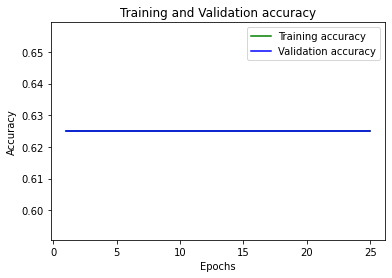

In [78]:
plot_accuracy(25, history)

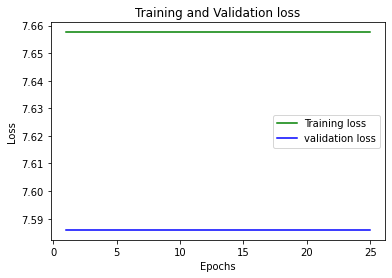

In [79]:
plot_losses(25,history)

## PART 2: Interlude: Applying a pre-trained convolutional neural network

In [23]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

vggmodel = applications.VGG16(weights='imagenet', include_top=True)

In [24]:
print(vggmodel.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [84]:
# load an image from file
image = load_img('0355.jpg', target_size=(224, 224))

# convert the image pixels to a numpy array
image = img_to_array(image)

In [85]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [86]:
# prepare the image for the VGG model
image = preprocess_input(image)

In [87]:
# predict the probability across all output classes
y_pred = vggmodel.predict(image)

In [91]:
# convert the probabilities to class labels
label = decode_predictions(y_pred)
label


[[('n03770679', 'minivan', 0.9122441),
  ('n03769881', 'minibus', 0.054375548),
  ('n03796401', 'moving_van', 0.017230708),
  ('n03930630', 'pickup', 0.0043421458),
  ('n04065272', 'recreational_vehicle', 0.0037186202)]]

In [92]:
# retrieve the most likely result, e.g. highest probability
label = label[0][0]

# print the classification
print(label[1], label[2]*100)

minivan 91.22440814971924


### The prediction says minivan but the image we provided looks closer to a car.

## PART 3: Using VGG-16 as a feature extractor

In [29]:
# Load model without classifier layer
feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                       input_shape=(img_size, img_size, 3))

In [30]:
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [31]:
feature_extractor.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [32]:
# Do not train existing weights
for layer in feature_extractor.layers:
    layer.trainable = False

In [33]:
train_generator = vgg_data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=False)

Found 1600 images belonging to 2 classes.


In [34]:
val_generator = vgg_data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=False)

Found 576 images belonging to 2 classes.


In [46]:
import numpy as np
y_pred = feature_extractor.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1)

In [43]:
def get_labels(n):
    return np.array([0]*(n//2) + [1]*(n//2))

In [80]:
def create_vgg16_features(folder_name):
    vgg_train_generator = vgg_data_gen.flow_from_directory(
        imgdir + '/'+ folder_name,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=False)

    cnn_features = feature_extractor.predict(vgg_train_generator)
    print(cnn_features.shape)
    
    # This will create two files - train_file and validation_file
    file_name = folder_name+"_file"
    with open(file_name, 'wb') as f:
        np.save(f, cnn_features)

In [81]:
# Call twice for training and validation set
create_vgg16_features("train")
create_vgg16_features("validation")

Found 1600 images belonging to 2 classes.
(1600, 2, 2, 512)
Found 576 images belonging to 2 classes.
(576, 2, 2, 512)


In [155]:
def train_on_cnnfeatures():
    with open('train_file', 'rb') as f:
        train_data = np.load(f)
    
    with open('validation_file', 'rb') as f:
        validation_data = np.load(f)
    
    num_classes=2
    model = keras.Sequential()

    model.add(feature_extractor)

    # Flattening the image pixels
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()
    model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
    
    model.fit(get_labels(10),steps_per_epoch=1, epochs=10, verbose=1, 
              validation_data=get_labels(10))

In [156]:
train_on_cnnfeatures()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_15 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               262272    
_________________________________________________________________
dense_30 (Dense)             (None, 2)                 258       
Total params: 14,977,218
Trainable params: 262,530
Non-trainable params: 14,714,688
_________________________________________________________________


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [143]:
def get_labels(n):
    return np.array([0]*(n//2) + [1]*(n//2))

In [141]:
with open('train_file', 'rb') as f:
        train_data = np.load(f)

In [151]:
get_labels(1600)

array([0, 0, 0, ..., 1, 1, 1])

In [152]:
 get_labels(train_data)

array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  8.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 3.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  1.,  0.],
         [ 0.,  0.,  0., ...,  0., 25.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       ...,


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 5.,  0.,  0., ...,  0.,  0.,  0.],
         [ 3.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  

## Part 4: Visualizing the learned features


In [132]:
first_layer_weights = vggmodel.get_weights()[0]
first_layer_weights.shape

(3, 3, 3, 64)

In [50]:
def kernel_image(weights, i, positive):
    
    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k
    
    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m 

    return k

In [198]:
# summarize filter shapes
for layer in feature_extractor.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    weights, biases = layer.get_weights()
    print(layer.name, weights.shape)
    

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [210]:
# plot first few filters
def plot_filters(k):
    f = plt.figure(figsize=(8,8))
    
    n_filters, ix = 3, 1
    for i in range(n_filters):
        # get the filter

        # plot each channel separately
        for j in range(3):
            # specify subplot and turn of axis
            ax = plt.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(k[:, :, j], cmap='gray')
            ix += 1
    # show the figure
    plt.show()

positive


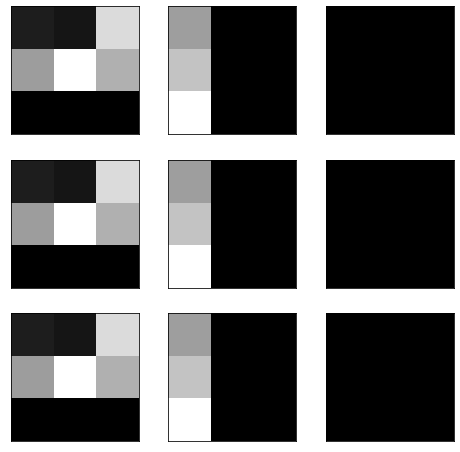

negative


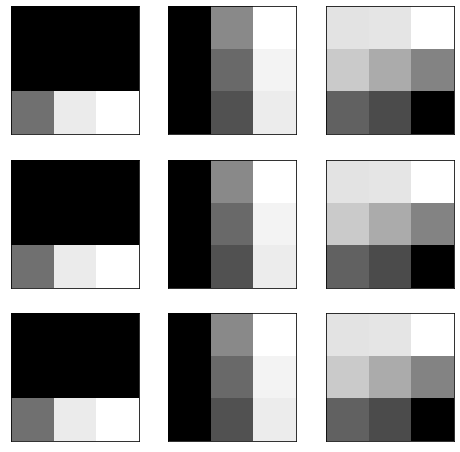

In [211]:
# Visualize some of the patterns used by the first convolutional layer
def pattern(i):
    k_pos = kernel_image(weights, i, True)
    print("positive")
    plot_filters(k_pos)

    print("negative")
    k_neg = kernel_image(weights, i, False)
    plot_filters(k_neg)

pattern(0)

positive


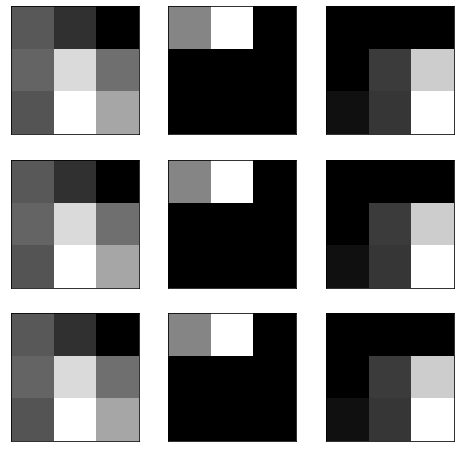

negative


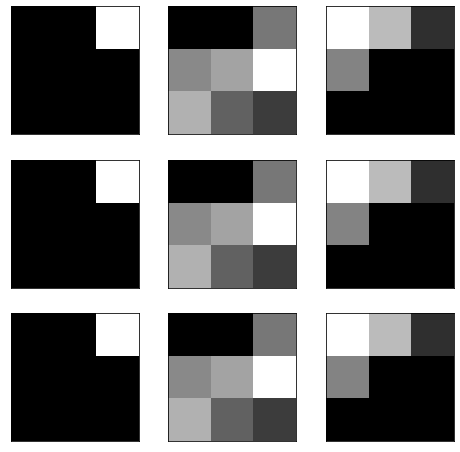

In [212]:
# Visualize some of the patterns used by second convolutional layer

pattern(1)